In [2]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
restaurant_data = pd.read_csv('chainness_point_2021_part1.csv')

In [4]:
#Looking at the first few values of the data frame
restaurant_data.head()

,RestaurantName,Cuisine,OpenHours,State,CNTY_GEOID,CNTY_NAME,UA_GEOID,UA_NAME,MSA_GEOID,MSA_NAME,Lon,Lat,Frequency,isChain
0,Subway,Restaurant,Sun 900 AM 1100 PM | Mon Sat 800 AM 1100 PM,OK,40143,Tulsa,88948.0,"Tulsa, OK",46140.0,"Tulsa, OK",-95.855606,36.119330,24333,1
1,Subway,Restaurant,Sun 1000 AM 730 PM | Mon Fri 930 AM 830 PM ...,OH,39133,Portage,17668.0,"Cleveland, OH",10420.0,"Akron, OH",-81.348560,41.320137,24333,1
2,Subway,Restaurant,Sun Sat 1200 AM 1200 AM,IL,17031,Cook,16264.0,"Chicago, IL--IN",16980.0,"Chicago-Naperville-Elgin, IL-IN-WI",-87.723145,41.775288,24333,1
3,Subway,Restaurant,Sun Sat 1000 AM 900 PM,AR,5085,Lonoke,50392.0,"Little Rock, AR",30780.0,"Little Rock-North Little Rock-Conway, AR",-92.009220,34.946293,24333,1
4,Subway,Restaurant,NaN,IL,17031,Cook,16264.0,"Chicago, IL--IN",16980.0,"Chicago-Naperville-Elgin, IL-IN-WI",-87.738870,41.657290,24333,1


In [5]:
#Looking at the last few values of the Data Frame
restaurant_data.tail()

,RestaurantName,Cuisine,OpenHours,State,CNTY_GEOID,CNTY_NAME,UA_GEOID,UA_NAME,MSA_GEOID,MSA_NAME,Lon,Lat,Frequency,isChain
239995,Osaka,Japanese Sushi Asian,Sun 1100 AM 930 PM | Mon Tue 430 PM 930 PM ...,IL,17167,Sangamon,83899.0,"Springfield, IL",44100.0,"Springfield, IL",-89.68251,39.764510,29,1
239996,Osaka,Chinese Asian,NaN,NH,33015,Rockingham,9271.0,"Boston, MA--NH--RI",14460.0,"Boston-Cambridge-Newton, MA-NH",-71.14898,42.887710,29,1
239997,Osaka,Japanese Sushi Asian,NaN,TX,48113,Dallas,22042.0,"Dallas--Fort Worth--Arlington, TX",19100.0,"Dallas-Fort Worth-Arlington, TX",-96.60479,32.968510,29,1
239998,Osaka,Japanese Sushi Asian,NaN,LA,22109,Terrebonne,40375.0,"Houma, LA",26380.0,"Houma-Thibodaux, LA",-90.76147,29.629390,29,1
239999,Osaka,Japanese Sushi Asian,NaN,NJ,34007,Camden,69076.0,"Philadelphia, PA--NJ--DE--MD",37980.0,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",-75.06840,39.915707,29,1


In [6]:
restaurant_data.describe()

,CNTY_GEOID,UA_GEOID,MSA_GEOID,Lon,Lat,Frequency,isChain
count,240000.000000,220562.000000,210340.000000,240000.000000,240000.000000,240000.000000,240000.0
mean,27768.371021,48743.514608,30028.990301,-92.099102,37.078796,5778.692600,1.0
std,16203.228987,27609.778480,11029.798203,15.527516,5.085956,7246.451265,0.0
min,1001.000000,37.000000,10180.000000,-166.548230,19.492480,29.000000,1.0
25%,12103.000000,22069.000000,19100.000000,-97.942405,33.610604,457.000000,1.0
50%,27053.000000,51445.000000,31080.000000,-87.633530,37.699535,2903.000000,1.0
75%,42043.000000,71317.000000,39300.000000,-80.861077,40.837080,7485.000000,1.0
max,56045.000000,98236.000000,49740.000000,-67.281624,71.288420,24333.000000,1.0


In [7]:
#Checking the number of null values in the Data Frame
restaurant_null_data_info = pd.DataFrame(restaurant_data.isna().sum()).reset_index().rename(columns={'index': 'Columns',0 : 'Null Count'})
restaurant_null_data_info

,Columns,Null Count
0,RestaurantName,0
1,Cuisine,2
2,OpenHours,51858
3,State,0
4,CNTY_GEOID,0
5,CNTY_NAME,0
6,UA_GEOID,19438
7,UA_NAME,19438
8,MSA_GEOID,29660
9,MSA_NAME,29660


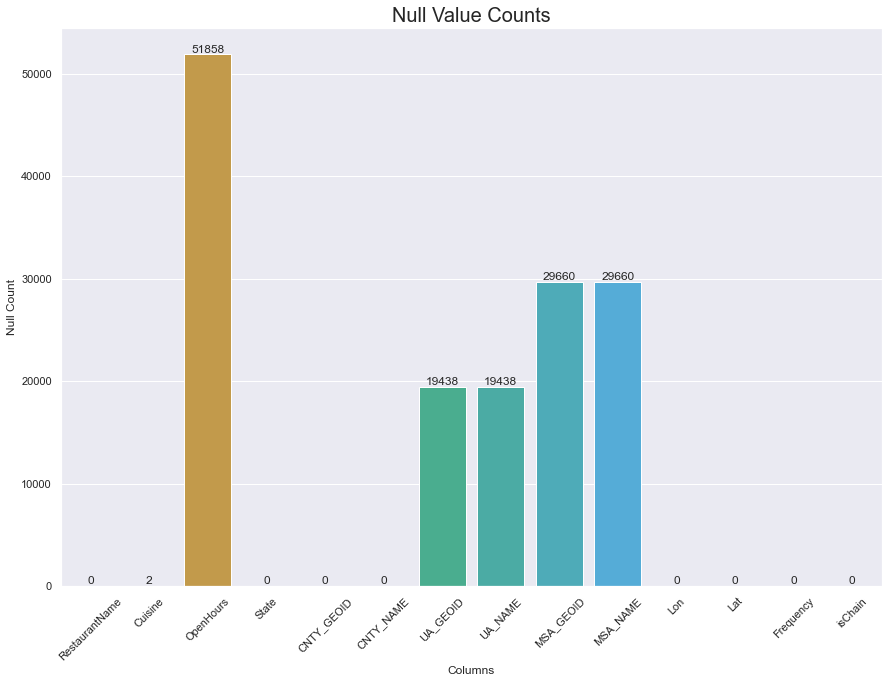

In [8]:
#Creating a plot to get an idea of the number of null values in the dataframe

sns.set(rc={'figure.figsize':(14.7,10.27)})
null_bar_plot = sns.barplot(data=restaurant_null_data_info, x="Columns",y="Null Count")
loc, labels = plt.xticks()
null_bar_plot.set_xticklabels(labels, rotation=45)
plt.title("Null Value Counts", fontsize = 20)

for i in null_bar_plot.containers:
    null_bar_plot.bar_label(i,)


In [9]:
#Getting the percentage of missing values
restaurant_data.isna().sum().sum()/restaurant_data.size * 100

4.4659523809523805

In [10]:
#Checking the missing rows in Cuisine
restaurant_data[restaurant_data['Cuisine'].isna()]

,RestaurantName,Cuisine,OpenHours,State,CNTY_GEOID,CNTY_NAME,UA_GEOID,UA_NAME,MSA_GEOID,MSA_NAME,Lon,Lat,Frequency,isChain
143253,Applebee's,NaN,Sun Thu 1130 AM 1100 PM | Fri Sat 1130 AM ...,NJ,34021,Mercer,88462.0,"Trenton, NJ",45940.0,"Trenton-Princeton, NJ",-74.68679,40.232690,1672,1
235623,54th Street,NaN,Sun Thu 1100 AM 1100 PM | Fri Sat 1100 AM ...,TX,48029,Bexar,78580.0,"San Antonio, TX",41700.0,"San Antonio-New Braunfels, TX",-98.47889,29.516527,34,1


In [11]:
#Checking for Applebee's
restaurant_data[restaurant_data['RestaurantName'] == 'Applebee\'s'].head()

,RestaurantName,Cuisine,OpenHours,State,CNTY_GEOID,CNTY_NAME,UA_GEOID,UA_NAME,MSA_GEOID,MSA_NAME,Lon,Lat,Frequency,isChain
141856,Applebee's,American,NaN,NV,32003,Clark,47995.0,"Las Vegas--Henderson, NV",29820.0,"Las Vegas-Henderson-Paradise, NV",-115.296680,36.097603,1672,1
141857,Applebee's,American Bar Pub,Sun Sat 1030 AM 200 AM,TX,48113,Dallas,22042.0,"Dallas--Fort Worth--Arlington, TX",19100.0,"Dallas-Fort Worth-Arlington, TX",-96.627030,32.797390,1672,1
141858,Applebee's,American Bar,Sun Thu 1100 AM 1200 PM | Fri Sat 1100 AM ...,GA,13021,Bibb,52822.0,"Macon, GA",31420.0,"Macon-Bibb County, GA",-83.661804,32.872093,1672,1
141859,Applebee's,American,Sun Thu 1100 AM 1200 AM | Fri Sat 1100 AM ...,MI,26125,Oakland,23824.0,"Detroit, MI",19820.0,"Detroit-Warren-Dearborn, MI",-83.438640,42.533010,1672,1
141860,Applebee's,American Bar,NaN,KS,20091,Johnson,43912.0,"Kansas City, MO--KS",28140.0,"Kansas City, MO-KS",-94.668680,38.928930,1672,1


In [12]:
#Here we see that majority of the Applebee's are American Bar Pub, so we'll substitute the Applebee's cuisine by American Bar Pub

restaurant_data[restaurant_data['RestaurantName'] == 'Applebee\'s']['Cuisine'].value_counts().head()

American Bar Pub    763
American Bar        491
American            117
Bar Pub American     95
American             47
Name: Cuisine, dtype: int64

In [13]:
#Checking for 54th Street

restaurant_data[restaurant_data['RestaurantName'] == '54th Street'].head()

,RestaurantName,Cuisine,OpenHours,State,CNTY_GEOID,CNTY_NAME,UA_GEOID,UA_NAME,MSA_GEOID,MSA_NAME,Lon,Lat,Frequency,isChain
235593,54th Street,Restaurant,NaN,TX,48141,El Paso,27253.0,"El Paso, TX--NM",21340.0,"El Paso, TX",-106.277490,31.660580,34,1
235594,54th Street,Restaurant,NaN,TX,48029,Bexar,78580.0,"San Antonio, TX",41700.0,"San Antonio-New Braunfels, TX",-98.563000,29.533060,34,1
235595,54th Street,American Bar,Sun Thu 1100 AM 1100 PM | Fri Sat 1100 AM ...,MO,29095,Jackson,43912.0,"Kansas City, MO--KS",28140.0,"Kansas City, MO-KS",-94.273476,39.003414,34,1
235596,54th Street,American Bar,Sun 1100 AM 1130 PM | Mon Wed 1100 AM 1200 ...,IL,17163,St. Clair,77770.0,"St. Louis, MO--IL",41180.0,"St. Louis, MO-IL",-89.928080,38.574120,34,1
235597,54th Street,American Bar,Sun Thu 1100 AM 1100 PM | Fri Sat 1100 AM ...,MO,29021,Buchanan,77743.0,"St. Joseph, MO--KS",41140.0,"St. Joseph, MO-KS",-94.814445,39.812706,34,1


In [14]:
#Here we see that majority of the 54th Street are American Bar, so we'll substitute the 54th Street cuisine by American Bar

restaurant_data[restaurant_data['RestaurantName'] == '54th Street']['Cuisine'].value_counts().head()

American Bar                        22
American Bar Pub                     4
American                             3
Restaurant                           2
Mexican American Bar Seafood Pub     1
Name: Cuisine, dtype: int64

In [15]:
#Substituting Null values for cuisine

restaurant_data.loc[(restaurant_data['RestaurantName'] == 'Applebee\'s') & (restaurant_data['Cuisine'].isna())] = restaurant_data.loc[(restaurant_data['RestaurantName'] == 'Applebee\'s') & (restaurant_data['Cuisine'].isna())].fillna("American Bar Pub")
restaurant_data.loc[(restaurant_data['RestaurantName'] == '54th Street') & (restaurant_data['Cuisine'].isna())] = restaurant_data.loc[(restaurant_data['RestaurantName'] == '54th Street') & (restaurant_data['Cuisine'].isna())].fillna("American Bar")

In [16]:
#Filled in Cusine value

restaurant_data.iloc[143253]

RestaurantName                                           Applebee's
Cuisine                                            American Bar Pub
OpenHours         Sun  Thu 1130 AM  1100 PM | Fri  Sat 1130 AM  ...
State                                                            NJ
CNTY_GEOID                                                    34021
CNTY_NAME                                                    Mercer
UA_GEOID                                                    88462.0
UA_NAME                                                 Trenton, NJ
MSA_GEOID                                                   45940.0
MSA_NAME                                      Trenton-Princeton, NJ
Lon                                                       -74.68679
Lat                                                        40.23269
Frequency                                                      1672
isChain                                                           1
Name: 143253, dtype: object

In [17]:
#Checking the missing rows in Cuisine after substituting

restaurant_data[restaurant_data['Cuisine'].isna()]

,RestaurantName,Cuisine,OpenHours,State,CNTY_GEOID,CNTY_NAME,UA_GEOID,UA_NAME,MSA_GEOID,MSA_NAME,Lon,Lat,Frequency,isChain


In [18]:
restaurant_data.head()

,RestaurantName,Cuisine,OpenHours,State,CNTY_GEOID,CNTY_NAME,UA_GEOID,UA_NAME,MSA_GEOID,MSA_NAME,Lon,Lat,Frequency,isChain
0,Subway,Restaurant,Sun 900 AM 1100 PM | Mon Sat 800 AM 1100 PM,OK,40143,Tulsa,88948.0,"Tulsa, OK",46140.0,"Tulsa, OK",-95.855606,36.119330,24333,1
1,Subway,Restaurant,Sun 1000 AM 730 PM | Mon Fri 930 AM 830 PM ...,OH,39133,Portage,17668.0,"Cleveland, OH",10420.0,"Akron, OH",-81.348560,41.320137,24333,1
2,Subway,Restaurant,Sun Sat 1200 AM 1200 AM,IL,17031,Cook,16264.0,"Chicago, IL--IN",16980.0,"Chicago-Naperville-Elgin, IL-IN-WI",-87.723145,41.775288,24333,1
3,Subway,Restaurant,Sun Sat 1000 AM 900 PM,AR,5085,Lonoke,50392.0,"Little Rock, AR",30780.0,"Little Rock-North Little Rock-Conway, AR",-92.009220,34.946293,24333,1
4,Subway,Restaurant,NaN,IL,17031,Cook,16264.0,"Chicago, IL--IN",16980.0,"Chicago-Naperville-Elgin, IL-IN-WI",-87.738870,41.657290,24333,1


In [19]:
#Checking the missing rows in Open Hours

open_missing_df = pd.DataFrame(restaurant_data[restaurant_data['OpenHours'].isna()]['RestaurantName'].value_counts()).reset_index().rename(columns ={'index':'Restaurant','RestaurantName':'Null Count'})
open_missing_df['Restaurant'][30:40]

30          Hungry Howies Pizza
31                  First Watch
32                    Taco Bell
33                      Chili's
34                      Quiznos
35                  Blaze Pizza
36    Red Robin Gourmet Burgers
37              Mariahs Cookies
38                  Burger King
39             Godfathers Pizza
Name: Restaurant, dtype: object

In [20]:
restaurant_data[restaurant_data['OpenHours'].isna()]

,RestaurantName,Cuisine,OpenHours,State,CNTY_GEOID,CNTY_NAME,UA_GEOID,UA_NAME,MSA_GEOID,MSA_NAME,Lon,Lat,Frequency,isChain
4,Subway,Restaurant,NaN,IL,17031,Cook,16264.0,"Chicago, IL--IN",16980.0,"Chicago-Naperville-Elgin, IL-IN-WI",-87.738870,41.657290,24333,1
15,Subway,Deli,NaN,NY,36081,Queens,63217.0,"New York--Newark, NY--NJ--CT",35620.0,"New York-Newark-Jersey City, NY-NJ-PA",-73.918220,40.758870,24333,1
22,Subway,Restaurant,NaN,CA,6079,San Luis Obispo,27261.0,"El Paso de Robles (Paso Robles)--Atascadero, CA",42020.0,"San Luis Obispo-Paso Robles, CA",-120.697750,35.513090,24333,1
76,Subway,Fast Food,NaN,IL,17031,Cook,16264.0,"Chicago, IL--IN",16980.0,"Chicago-Naperville-Elgin, IL-IN-WI",-87.624626,41.880226,24333,1
117,Subway,Restaurant,NaN,NY,36061,New York,63217.0,"New York--Newark, NY--NJ--CT",35620.0,"New York-Newark-Jersey City, NY-NJ-PA",-73.992714,40.735770,24333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239985,Osaka,Japanese,NaN,NC,37115,Madison,NaN,NaN,11700.0,"Asheville, NC",-82.539860,35.822430,29,1
239996,Osaka,Chinese Asian,NaN,NH,33015,Rockingham,9271.0,"Boston, MA--NH--RI",14460.0,"Boston-Cambridge-Newton, MA-NH",-71.148980,42.887710,29,1
239997,Osaka,Japanese Sushi Asian,NaN,TX,48113,Dallas,22042.0,"Dallas--Fort Worth--Arlington, TX",19100.0,"Dallas-Fort Worth-Arlington, TX",-96.604790,32.968510,29,1
239998,Osaka,Japanese Sushi Asian,NaN,LA,22109,Terrebonne,40375.0,"Houma, LA",26380.0,"Houma-Thibodaux, LA",-90.761470,29.629390,29,1


In [21]:
restaurant_data[(restaurant_data['RestaurantName'] == 'Seven Eleven') & restaurant_data['OpenHours'].notnull()]['OpenHours'].mode(0).values[0]

'Sun  Sat 1200 AM  1159 PM'

In [22]:
len(restaurant_data[(restaurant_data['RestaurantName'] == 'Seven Eleven') & restaurant_data['OpenHours'].notnull()])

28

In [23]:
#Creating a dataframe which stores the mode of each column of the restaurant having missing values for the OpenHours

open_hours_df = pd.DataFrame(columns=['RestaurantName', 'OpenHours'])
RestaurantNameList = []
OpenHoursList = []

for i in range(len(open_missing_df)):
    if len(restaurant_data[(restaurant_data['RestaurantName'] == open_missing_df['Restaurant'][i]) & restaurant_data['OpenHours'].notnull()])!=0:
        RestaurantNameList.append(open_missing_df['Restaurant'][i]),
        OpenHoursList.append(restaurant_data[(restaurant_data['RestaurantName'] == open_missing_df['Restaurant'][i]) & restaurant_data['OpenHours'].notnull()]['OpenHours'].mode(0).values[0])

In [24]:
open_hours_dict = res = {RestaurantNameList[i]: OpenHoursList[i] for i in range(len(OpenHoursList))}

In [25]:
open_hours_dict

{'Seven Eleven': 'Sun  Sat 1200 AM  1159 PM',
 'Starbucks': 'Sun 800 AM  800 PM | Mon  Sat 800 AM  900 PM',
 'Little Caesars': 'Sun  Thu 1100 AM  1000 PM | Fri  Sat 1100 AM  1100 PM',
 'Waffle House': 'Sun  Sat 1200 AM  1159 PM',
 'Panda Express': 'Sun  Sat 1000 AM  1000 PM',
 'Pizza Hut': 'Sun  Thu 1100 AM  1000 PM | Fri  Sat 1100 AM  1100 PM',
 'Subway': 'Sun  Sat 900 AM  900 PM',
 "Jimmy John's": 'Sun  Sat 1100 AM  1000 PM',
 'Firehouse Subs': 'Sun  Sat 1030 AM  900 PM',
 'IHOP': 'Sun  Sat 1200 AM  1159 PM',
 'Jersey Mikes Subs': 'Sun  Sat 1000 AM  900 PM',
 'Wingstop': 'Sun  Sat 1100 AM  1200 AM',
 'Dairy Queen': 'Sun  Sat 1000 AM  1000 PM',
 'Buffalo Wild Wings': 'Sun 1100 AM  1200 AM | Mon  Thu 1100 AM  100 AM | Fri  Sat 1100 AM  200 AM',
 'Auntie Annes': 'Sun 1000 AM  600 PM | Mon  Sat 1000 AM  900 PM',
 "Zaxby's": 'Sun  Sat 1030 AM  1000 PM',
 "McDonald's": 'Sun  Sat 1200 AM  1200 AM',
 'Marcos Pizza': 'Sun  Thu 1100 AM  1000 PM | Fri  Sat 1100 AM  1100 PM',
 'The Ice Cream Sho

In [26]:
open_hours_list = []
for i in range(len(restaurant_data)):
    open_hours_list.append(random.randint(8, 13))

In [27]:
restaurant_data['OpenHours'] = open_hours_list

In [28]:
restaurant_data.head()

,RestaurantName,Cuisine,OpenHours,State,CNTY_GEOID,CNTY_NAME,UA_GEOID,UA_NAME,MSA_GEOID,MSA_NAME,Lon,Lat,Frequency,isChain
0,Subway,Restaurant,10,OK,40143,Tulsa,88948.0,"Tulsa, OK",46140.0,"Tulsa, OK",-95.855606,36.119330,24333,1
1,Subway,Restaurant,8,OH,39133,Portage,17668.0,"Cleveland, OH",10420.0,"Akron, OH",-81.348560,41.320137,24333,1
2,Subway,Restaurant,12,IL,17031,Cook,16264.0,"Chicago, IL--IN",16980.0,"Chicago-Naperville-Elgin, IL-IN-WI",-87.723145,41.775288,24333,1
3,Subway,Restaurant,12,AR,5085,Lonoke,50392.0,"Little Rock, AR",30780.0,"Little Rock-North Little Rock-Conway, AR",-92.009220,34.946293,24333,1
4,Subway,Restaurant,8,IL,17031,Cook,16264.0,"Chicago, IL--IN",16980.0,"Chicago-Naperville-Elgin, IL-IN-WI",-87.738870,41.657290,24333,1


In [29]:
restaurant_data[restaurant_data['OpenHours'].isna()]

,RestaurantName,Cuisine,OpenHours,State,CNTY_GEOID,CNTY_NAME,UA_GEOID,UA_NAME,MSA_GEOID,MSA_NAME,Lon,Lat,Frequency,isChain


In [30]:
#Checking the missing rows in Cuisine

restaurant_data[restaurant_data['UA_GEOID'].isna()].head()

,RestaurantName,Cuisine,OpenHours,State,CNTY_GEOID,CNTY_NAME,UA_GEOID,UA_NAME,MSA_GEOID,MSA_NAME,Lon,Lat,Frequency,isChain
6,Subway,Restaurant,8,FL,12001,Alachua,NaN,NaN,23540.0,"Gainesville, FL",-82.281210,29.510965,24333,1
11,Subway,Fast Food,9,TN,47183,Weakley,NaN,NaN,NaN,NaN,-88.706850,36.277157,24333,1
51,Subway,American Fast Food,8,MI,26065,Ingham,NaN,NaN,29620.0,"Lansing-East Lansing, MI",-84.440765,42.451767,24333,1
57,Subway,Restaurant,8,OR,41043,Linn,NaN,NaN,10540.0,"Albany-Lebanon, OR",-123.067000,44.555305,24333,1
61,Subway,American Deli,13,OR,41059,Umatilla,NaN,NaN,NaN,NaN,-118.684740,45.645170,24333,1


In [31]:
restaurant_data[restaurant_data['UA_NAME'].isna()].head()

,RestaurantName,Cuisine,OpenHours,State,CNTY_GEOID,CNTY_NAME,UA_GEOID,UA_NAME,MSA_GEOID,MSA_NAME,Lon,Lat,Frequency,isChain
6,Subway,Restaurant,8,FL,12001,Alachua,NaN,NaN,23540.0,"Gainesville, FL",-82.281210,29.510965,24333,1
11,Subway,Fast Food,9,TN,47183,Weakley,NaN,NaN,NaN,NaN,-88.706850,36.277157,24333,1
51,Subway,American Fast Food,8,MI,26065,Ingham,NaN,NaN,29620.0,"Lansing-East Lansing, MI",-84.440765,42.451767,24333,1
57,Subway,Restaurant,8,OR,41043,Linn,NaN,NaN,10540.0,"Albany-Lebanon, OR",-123.067000,44.555305,24333,1
61,Subway,American Deli,13,OR,41059,Umatilla,NaN,NaN,NaN,NaN,-118.684740,45.645170,24333,1


In [32]:
restaurant_data[restaurant_data['MSA_GEOID'].isna()].head()

,RestaurantName,Cuisine,OpenHours,State,CNTY_GEOID,CNTY_NAME,UA_GEOID,UA_NAME,MSA_GEOID,MSA_NAME,Lon,Lat,Frequency,isChain
7,Subway,Deli Fast Food,10,KY,21179,Nelson,5059.0,"Bardstown, KY",NaN,NaN,-85.468890,37.826790,24333,1
11,Subway,Fast Food,9,TN,47183,Weakley,NaN,NaN,NaN,NaN,-88.706850,36.277157,24333,1
14,Subway,Restaurant,10,WI,55081,Monroe,83521.0,"Sparta, WI",NaN,NaN,-90.832890,43.941242,24333,1
18,Subway,Deli,12,AR,5041,Desha,52579.0,"McGehee, AR",NaN,NaN,-91.383540,33.611923,24333,1
21,Subway,Restaurant,10,IA,19131,Mitchell,66052.0,"Osage, IA",NaN,NaN,-92.810394,43.283860,24333,1


In [33]:
restaurant_data[restaurant_data['MSA_NAME'].isna()].head()

,RestaurantName,Cuisine,OpenHours,State,CNTY_GEOID,CNTY_NAME,UA_GEOID,UA_NAME,MSA_GEOID,MSA_NAME,Lon,Lat,Frequency,isChain
7,Subway,Deli Fast Food,10,KY,21179,Nelson,5059.0,"Bardstown, KY",NaN,NaN,-85.468890,37.826790,24333,1
11,Subway,Fast Food,9,TN,47183,Weakley,NaN,NaN,NaN,NaN,-88.706850,36.277157,24333,1
14,Subway,Restaurant,10,WI,55081,Monroe,83521.0,"Sparta, WI",NaN,NaN,-90.832890,43.941242,24333,1
18,Subway,Deli,12,AR,5041,Desha,52579.0,"McGehee, AR",NaN,NaN,-91.383540,33.611923,24333,1
21,Subway,Restaurant,10,IA,19131,Mitchell,66052.0,"Osage, IA",NaN,NaN,-92.810394,43.283860,24333,1


In [34]:
restaurant_data = restaurant_data.dropna()

In [35]:
restaurant_data.isna().sum()

RestaurantName    0
Cuisine           0
OpenHours         0
State             0
CNTY_GEOID        0
CNTY_NAME         0
UA_GEOID          0
UA_NAME           0
MSA_GEOID         0
MSA_NAME          0
Lon               0
Lat               0
Frequency         0
isChain           0
dtype: int64

In [36]:
#Saving the final CSV File after data cleaning

restaurant_data.to_csv('Restaurant_Data_Final.csv')

In [37]:
#DATA VISUALIZATION
restaurant_data_final = pd.read_csv('Restaurant_Data_Final.csv')

In [38]:
restaurant_data_final.head()

,Unnamed: 0,RestaurantName,Cuisine,OpenHours,State,CNTY_GEOID,CNTY_NAME,UA_GEOID,UA_NAME,MSA_GEOID,MSA_NAME,Lon,Lat,Frequency,isChain
0,0,Subway,Restaurant,10,OK,40143,Tulsa,88948.0,"Tulsa, OK",46140.0,"Tulsa, OK",-95.855606,36.119330,24333,1
1,1,Subway,Restaurant,8,OH,39133,Portage,17668.0,"Cleveland, OH",10420.0,"Akron, OH",-81.348560,41.320137,24333,1
2,2,Subway,Restaurant,12,IL,17031,Cook,16264.0,"Chicago, IL--IN",16980.0,"Chicago-Naperville-Elgin, IL-IN-WI",-87.723145,41.775288,24333,1
3,3,Subway,Restaurant,12,AR,5085,Lonoke,50392.0,"Little Rock, AR",30780.0,"Little Rock-North Little Rock-Conway, AR",-92.009220,34.946293,24333,1
4,4,Subway,Restaurant,8,IL,17031,Cook,16264.0,"Chicago, IL--IN",16980.0,"Chicago-Naperville-Elgin, IL-IN-WI",-87.738870,41.657290,24333,1


In [39]:
restaurant_data_final.columns

Index(['Unnamed: 0', 'RestaurantName', 'Cuisine', 'OpenHours', 'State',
       'CNTY_GEOID', 'CNTY_NAME', 'UA_GEOID', 'UA_NAME', 'MSA_GEOID',
       'MSA_NAME', 'Lon', 'Lat', 'Frequency', 'isChain'],
      dtype='object')

In [40]:
restaurant_data_final = restaurant_data_final.drop(['Unnamed: 0'], axis = 1)

In [41]:
restaurant_data_final

,RestaurantName,Cuisine,OpenHours,State,CNTY_GEOID,CNTY_NAME,UA_GEOID,UA_NAME,MSA_GEOID,MSA_NAME,Lon,Lat,Frequency,isChain
0,Subway,Restaurant,10,OK,40143,Tulsa,88948.0,"Tulsa, OK",46140.0,"Tulsa, OK",-95.855606,36.119330,24333,1
1,Subway,Restaurant,8,OH,39133,Portage,17668.0,"Cleveland, OH",10420.0,"Akron, OH",-81.348560,41.320137,24333,1
2,Subway,Restaurant,12,IL,17031,Cook,16264.0,"Chicago, IL--IN",16980.0,"Chicago-Naperville-Elgin, IL-IN-WI",-87.723145,41.775288,24333,1
3,Subway,Restaurant,12,AR,5085,Lonoke,50392.0,"Little Rock, AR",30780.0,"Little Rock-North Little Rock-Conway, AR",-92.009220,34.946293,24333,1
4,Subway,Restaurant,8,IL,17031,Cook,16264.0,"Chicago, IL--IN",16980.0,"Chicago-Naperville-Elgin, IL-IN-WI",-87.738870,41.657290,24333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198663,Osaka,Japanese Sushi Asian,9,IL,17167,Sangamon,83899.0,"Springfield, IL",44100.0,"Springfield, IL",-89.682510,39.764510,29,1
198664,Osaka,Chinese Asian,12,NH,33015,Rockingham,9271.0,"Boston, MA--NH--RI",14460.0,"Boston-Cambridge-Newton, MA-NH",-71.148980,42.887710,29,1
198665,Osaka,Japanese Sushi Asian,12,TX,48113,Dallas,22042.0,"Dallas--Fort Worth--Arlington, TX",19100.0,"Dallas-Fort Worth-Arlington, TX",-96.604790,32.968510,29,1
198666,Osaka,Japanese Sushi Asian,9,LA,22109,Terrebonne,40375.0,"Houma, LA",26380.0,"Houma-Thibodaux, LA",-90.761470,29.629390,29,1


In [42]:
restaurant_data_final.isna().sum()

RestaurantName    0
Cuisine           0
OpenHours         0
State             0
CNTY_GEOID        0
CNTY_NAME         0
UA_GEOID          0
UA_NAME           0
MSA_GEOID         0
MSA_NAME          0
Lon               0
Lat               0
Frequency         0
isChain           0
dtype: int64

In [43]:
restaurant_data_final.describe()

,OpenHours,CNTY_GEOID,UA_GEOID,MSA_GEOID,Lon,Lat,Frequency,isChain
count,198668.000000,198668.000000,198668.000000,198668.000000,198668.000000,198668.000000,198668.000000,198668.0
mean,10.503725,27245.638392,48729.456707,30061.359152,-92.402183,36.956113,5435.100419,1.0
std,1.708610,16345.694008,27557.023924,11005.529911,16.121968,5.122396,6953.563491,0.0
min,8.000000,1001.000000,37.000000,10180.000000,-158.189600,20.689200,29.000000,1.0
25%,9.000000,12086.000000,22042.000000,19100.000000,-98.624655,33.538007,421.000000,1.0
50%,11.000000,26125.000000,51445.000000,31080.000000,-87.510300,37.697127,2687.000000,1.0
75%,12.000000,42019.000000,71317.000000,39300.000000,-80.383816,40.791447,7247.000000,1.0
max,13.000000,56025.000000,98209.000000,49740.000000,-68.646570,64.858540,24333.000000,1.0


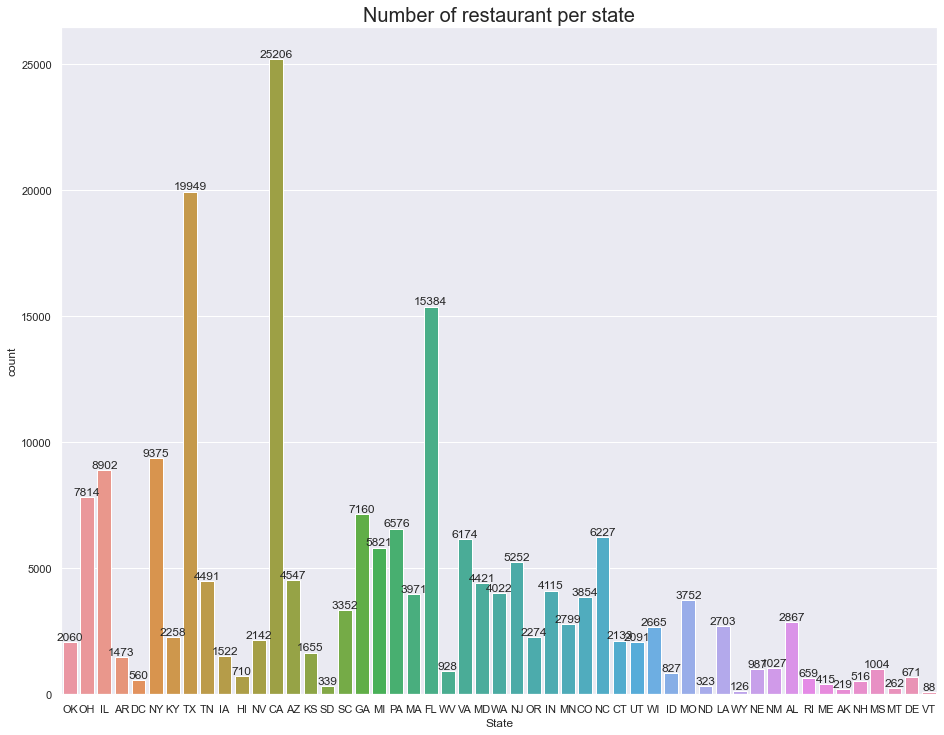

In [44]:
#Creating a plot to get an idea of the open hours in the dataframe

sns.set(rc={'figure.figsize':(15.7,12.27)})
null_bar_plot = sns.countplot(data=restaurant_data_final, x=restaurant_data_final['State'])
loc, labels = plt.xticks()
null_bar_plot.set_xticklabels(labels, rotation=0)
plt.title("Number of restaurant per state", fontsize = 20)

for i in null_bar_plot.containers:
    null_bar_plot.bar_label(i,)

In [45]:
# Let's look at the type of restaurants in California

restaurant_data_california = restaurant_data_final[restaurant_data_final['State'] == 'CA']
restaurant_data_california

,RestaurantName,Cuisine,OpenHours,State,CNTY_GEOID,CNTY_NAME,UA_GEOID,UA_NAME,MSA_GEOID,MSA_NAME,Lon,Lat,Frequency,isChain
16,Subway,Restaurant,13,CA,6079,San Luis Obispo,27261.0,"El Paso de Robles (Paso Robles)--Atascadero, CA",42020.0,"San Luis Obispo-Paso Robles, CA",-120.697750,35.513090,24333,1
19,Subway,Restaurant,10,CA,6037,Los Angeles,51445.0,"Los Angeles--Long Beach--Anaheim, CA",31080.0,"Los Angeles-Long Beach-Anaheim, CA",-117.999100,34.051636,24333,1
26,Subway,Fast Food,9,CA,6097,Sonoma,68887.0,"Petaluma, CA",42220.0,"Santa Rosa-Petaluma, CA",-122.668070,38.276000,24333,1
37,Subway,American Deli,12,CA,6073,San Diego,78661.0,"San Diego, CA",41740.0,"San Diego-Chula Vista-Carlsbad, CA",-117.100590,32.583042,24333,1
50,Subway,Restaurant,11,CA,6071,San Bernardino,5302.0,"Barstow, CA",40140.0,"Riverside-San Bernardino-Ontario, CA",-117.022290,34.885210,24333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198643,North Italia,Italian Pizza,8,CA,6037,Los Angeles,51445.0,"Los Angeles--Long Beach--Anaheim, CA",31080.0,"Los Angeles-Long Beach-Anaheim, CA",-118.496260,34.013750,29,1
198645,North Italia,Italian Pizza,13,CA,6059,Orange,51445.0,"Los Angeles--Long Beach--Anaheim, CA",31080.0,"Los Angeles-Long Beach-Anaheim, CA",-117.845050,33.671800,29,1
198647,North Italia,Italian,8,CA,6073,San Diego,78661.0,"San Diego, CA",41740.0,"San Diego-Chula Vista-Carlsbad, CA",-117.164250,32.769020,29,1
198649,North Italia,Italian Pizza,11,CA,6037,Los Angeles,51445.0,"Los Angeles--Long Beach--Anaheim, CA",31080.0,"Los Angeles-Long Beach-Anaheim, CA",-118.395744,33.902527,29,1


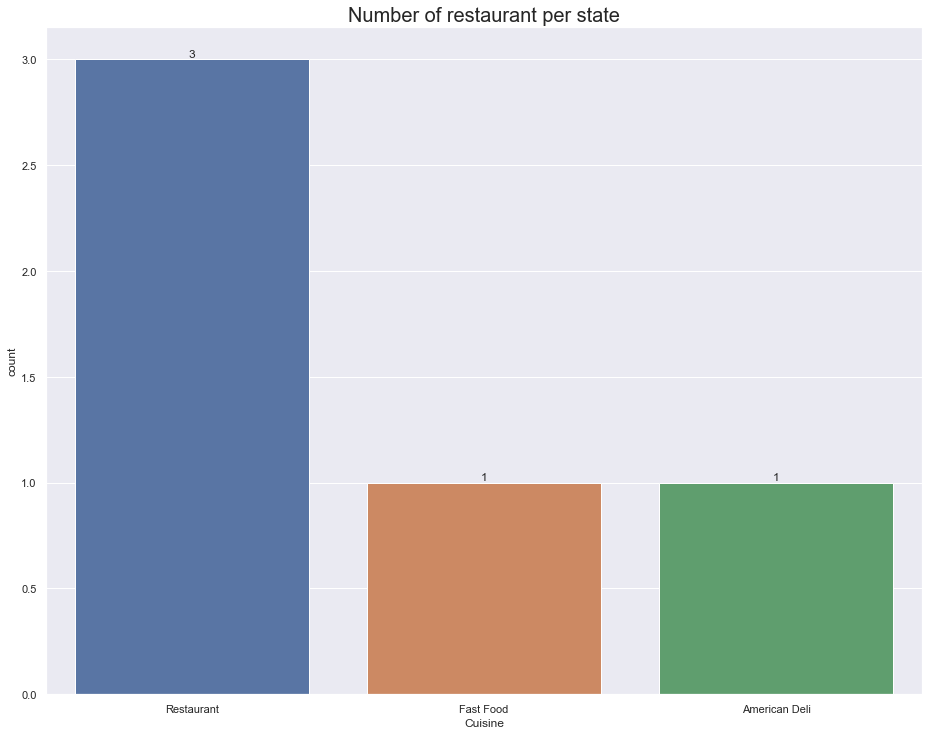

In [47]:
#Creating a plot to get an idea of the type of Cuisine in California

sns.set(rc={'figure.figsize':(15.7,12.27)})
null_bar_plot = sns.countplot(data=restaurant_data_california[0:5], x='Cuisine')
loc, labels = plt.xticks()
null_bar_plot.set_xticklabels(labels, rotation=0)
plt.title("Number of restaurant per state", fontsize = 20)

for i in null_bar_plot.containers:
    null_bar_plot.bar_label(i,)

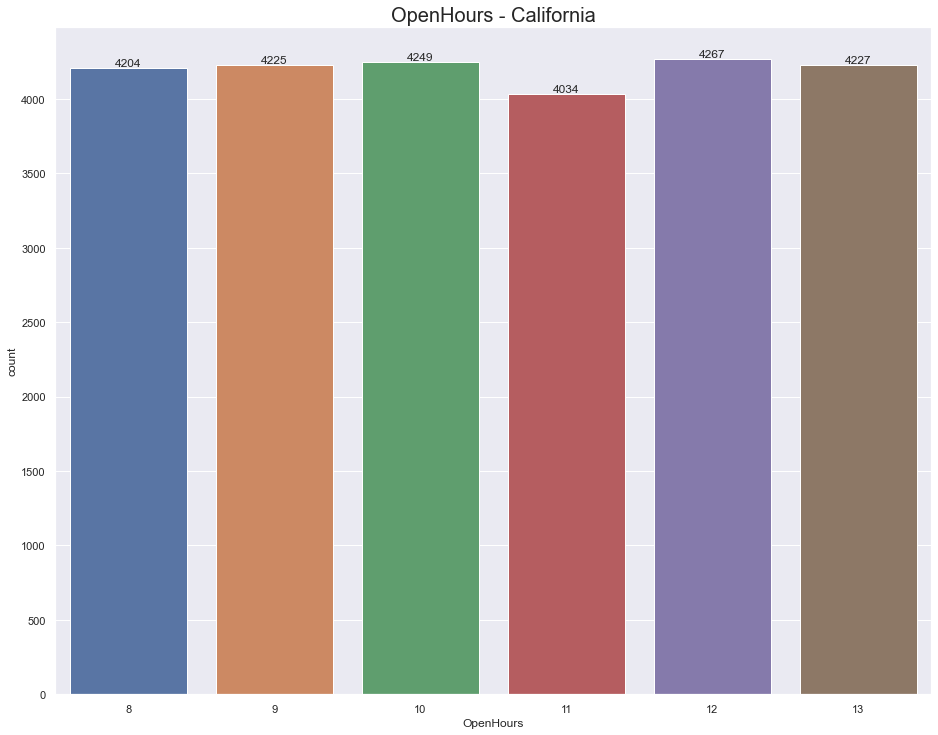

In [48]:
#Creating a plot to get an idea of the type of Cuisine in California

sns.set(rc={'figure.figsize':(15.7,12.27)})
null_bar_plot = sns.countplot(data=restaurant_data_california, x='OpenHours')
loc, labels = plt.xticks()
null_bar_plot.set_xticklabels(labels, rotation=0)
plt.title("OpenHours - California", fontsize = 20)

for i in null_bar_plot.containers:
    null_bar_plot.bar_label(i,)